In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import matplotlib.pyplot as plt

from util.util_gamma_rule import calc_vals_batch
from util.util_pickle import load_data
from util.plot_svecs import plot_svecs
from util.naming import *
from util.util_lrp import *
from util.util_cnn import *
from util.util_data_summary import condition_number

In [2]:
%matplotlib inline

# Plotting Svecs

In [3]:
normalized = False

gamma_selection = [32, 38, 40, 50]
# gamma_selection = [ 38 ]
val_selection = [0,2,-1]
val_selection = None

normalized_str = ['__unnormalized', ''][normalized]
iw = -1

## LRP

In [13]:
model_dict = load_mnist_v4_models()
model_d3 = model_dict['cb1-8-8-8_cb2-16-16-16_seed-0']

data, target = first_mnist_batch(batch_size=100)

As, Ls = layerwise_forward_pass(model_d3, data)
A = [a.detach().flatten() for a in As[15]]

Attempt loading: mnist first_batch_1000


In [63]:
[(a>0).mean(dtype=float) for a in A]

[tensor(0.4180, dtype=torch.float64),
 tensor(0.2969, dtype=torch.float64),
 tensor(0.4258, dtype=torch.float64),
 tensor(0.4062, dtype=torch.float64),
 tensor(0.5234, dtype=torch.float64),
 tensor(0.4492, dtype=torch.float64),
 tensor(0.4180, dtype=torch.float64),
 tensor(0.4062, dtype=torch.float64),
 tensor(0.4102, dtype=torch.float64),
 tensor(0.3242, dtype=torch.float64),
 tensor(0.4766, dtype=torch.float64),
 tensor(0.4844, dtype=torch.float64),
 tensor(0.3320, dtype=torch.float64),
 tensor(0.4727, dtype=torch.float64),
 tensor(0.3789, dtype=torch.float64),
 tensor(0.4414, dtype=torch.float64),
 tensor(0.3789, dtype=torch.float64),
 tensor(0.4453, dtype=torch.float64),
 tensor(0.4336, dtype=torch.float64),
 tensor(0.4453, dtype=torch.float64),
 tensor(0.4844, dtype=torch.float64),
 tensor(0.4805, dtype=torch.float64),
 tensor(0.3945, dtype=torch.float64),
 tensor(0.4648, dtype=torch.float64),
 tensor(0.4141, dtype=torch.float64),
 tensor(0.4961, dtype=torch.float64),
 tensor(0.44

In [64]:
key = '__15_to_0__testset100__all_gamma__gammas80'
mats = load_data('d3', 'LRP'+key)
mats = mats[:1, :1]
mats = batch_transform_xai_mat(mats, A, first_p = 20)


svals_lrp, lvecs_lrp, rvecs_lrp = calc_vals_batch(mats, return_vecs=True)

Attempt loading: d3 LRP__15_to_0__testset100__all_gamma__gammas80


1it [00:02,  2.53s/it]


### Plotting Svals for data points by condition number

In [65]:
at_gamma = 50
at_gamma = 38
at_gamma = 39

cond_number_lrp = condition_number(svals_lrp, percentile=1)
cond_order_lrp = cond_number_lrp[0, :, at_gamma].argsort()

print('number of singular values/activated outputs:\n(Sorted by increasing condition number)')
# for i in cond_order_lrp: print(unicode_bars[(svals_lrp[0,i,at_gamma] > 0).sum()], end='')

number of singular values/activated outputs:
(Sorted by increasing condition number)


#### Exemplary point with average condition number

Condition number: [  975.32778331  1141.14352292  1948.92415123 32977.57675242]


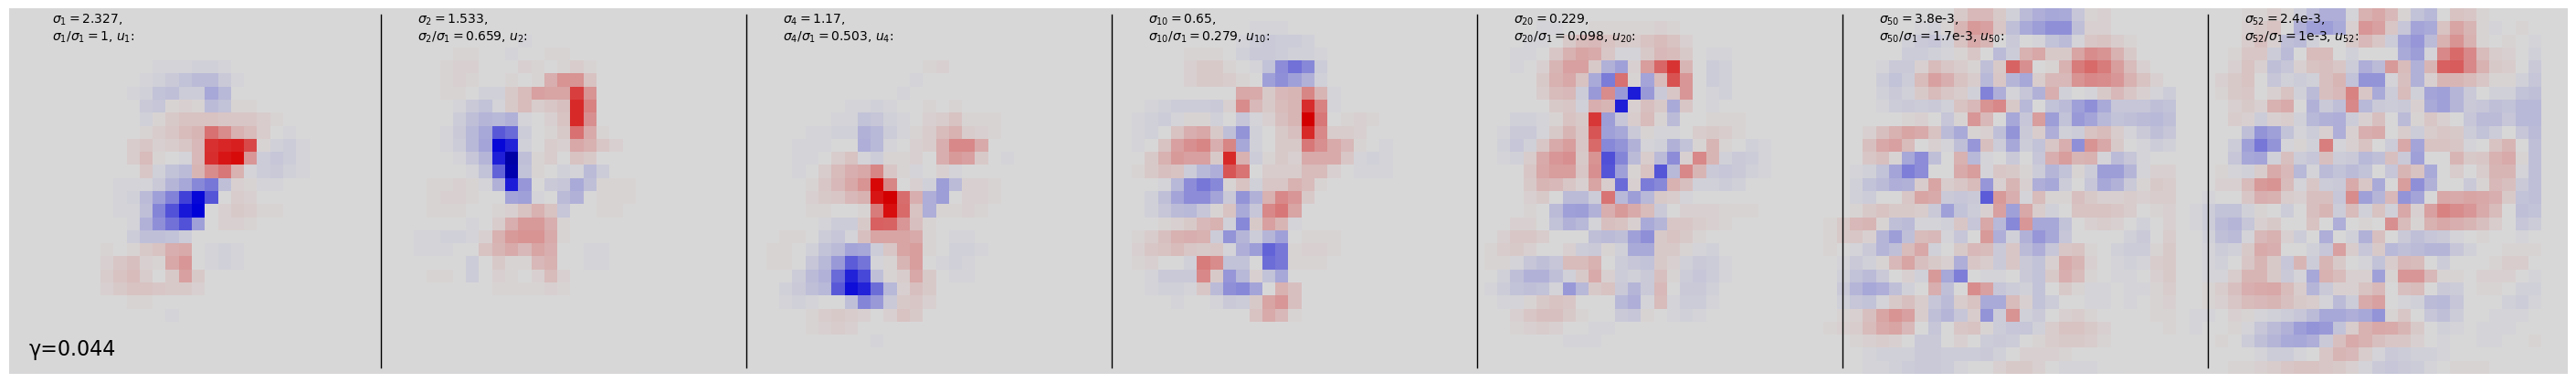

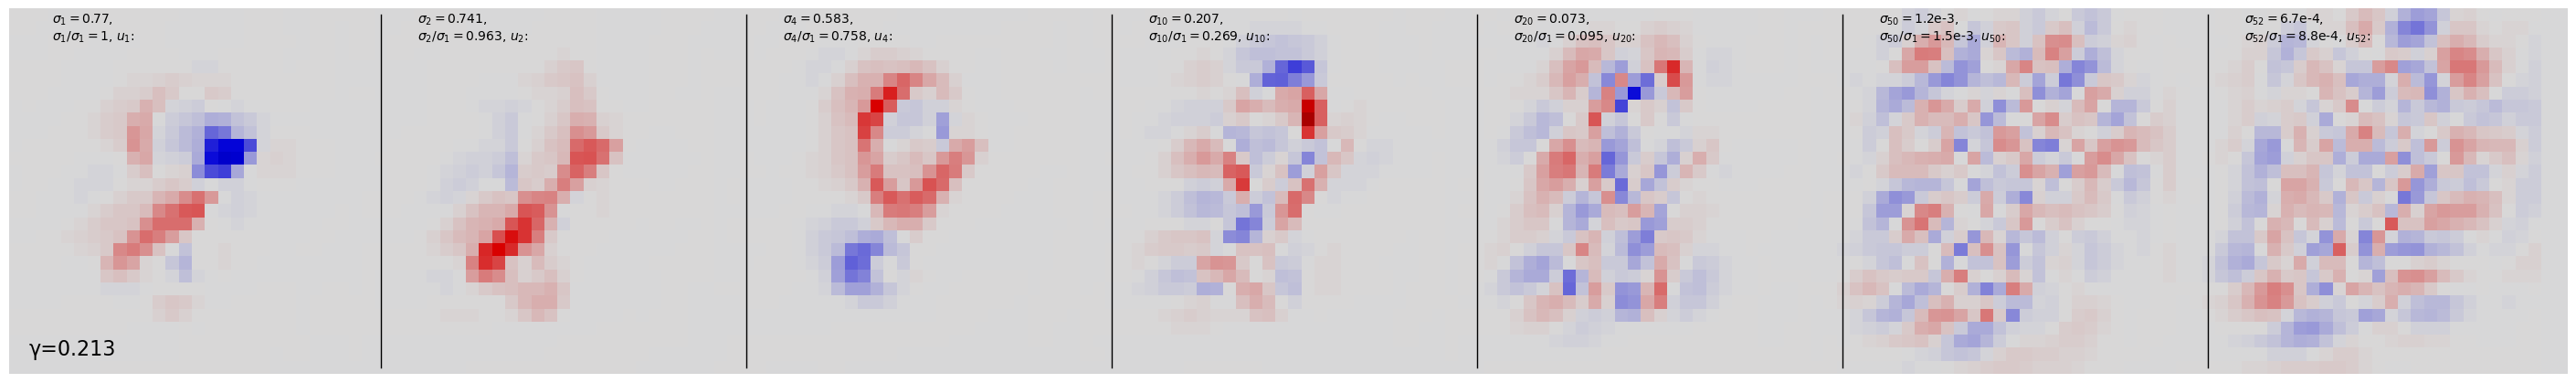

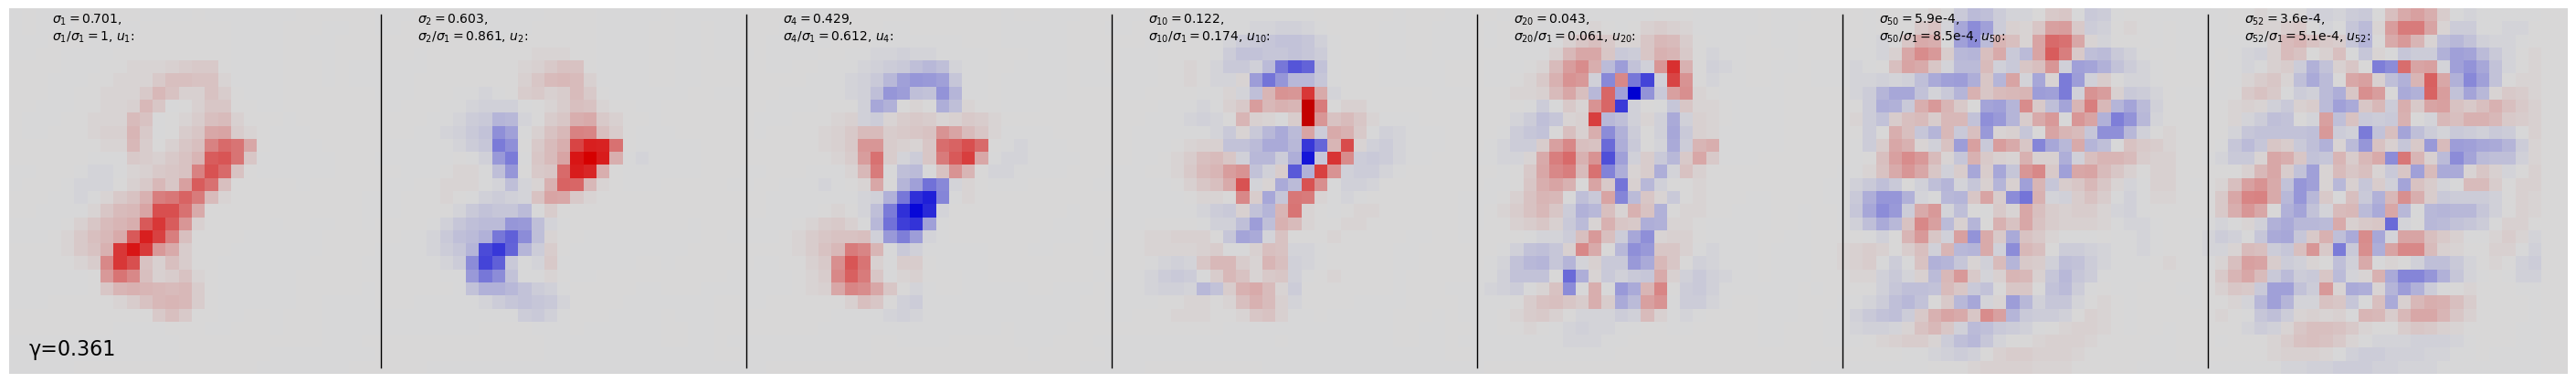

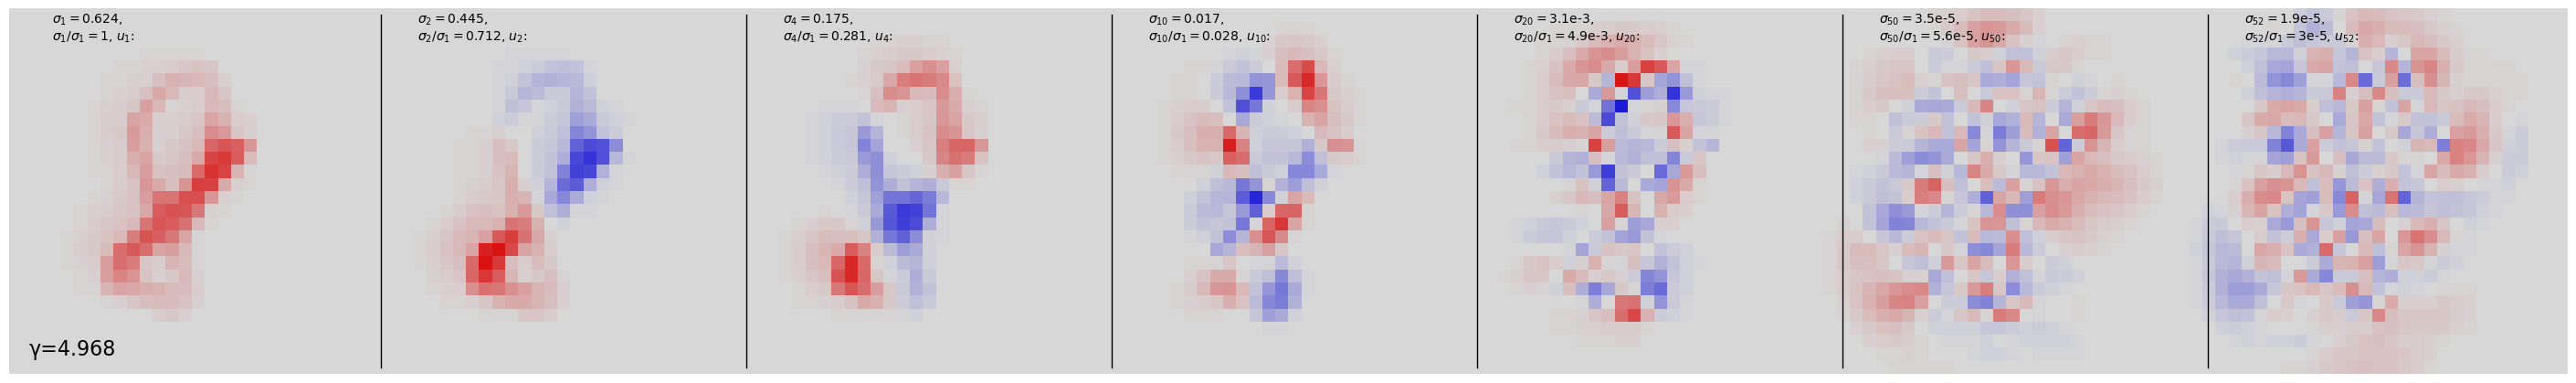

In [66]:
ip = 2
# ip = cond_order_lrp[56]
ip = 36
ip = 0

save_plot = lambda *x, **y: None

print('Condition number:', cond_number_lrp[0, ip, gamma_selection])
# plot_svecs(svals_lrp, lvecs_lrp, None, iw, ip, gamma_selection, val_selection, save_func=save_plot)
plot_svecs(svals_lrp, lvecs_lrp, None, iw, ip, gamma_selection, [0,1,3,9,19,49,-1], save_func=None, decrease = 0)

#### Few points, multiple gamma

- Comparing at data points whose condition number is small (i=31) and large (i=48) for gamma=0.213 (i=38 of 80)
    - point with high condition number still has a more detail focused heatmap. main reason for ill condition is a large first sval.
    - 

Condtion number: [10.27545661  6.21681093  7.79299766 32.25577153]
method:  γ=0.044


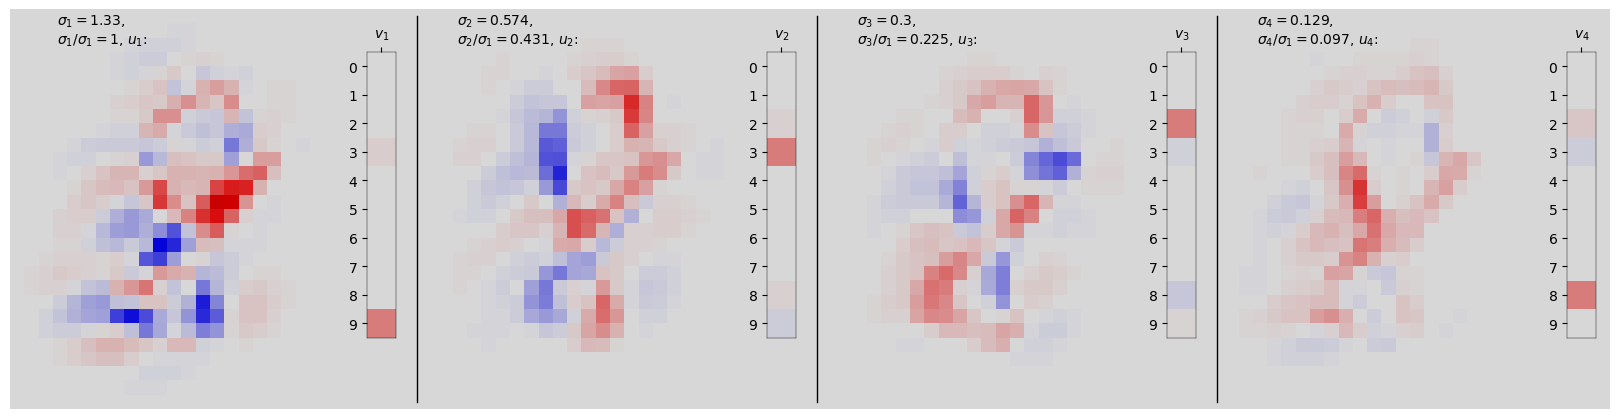

method:  γ=0.213


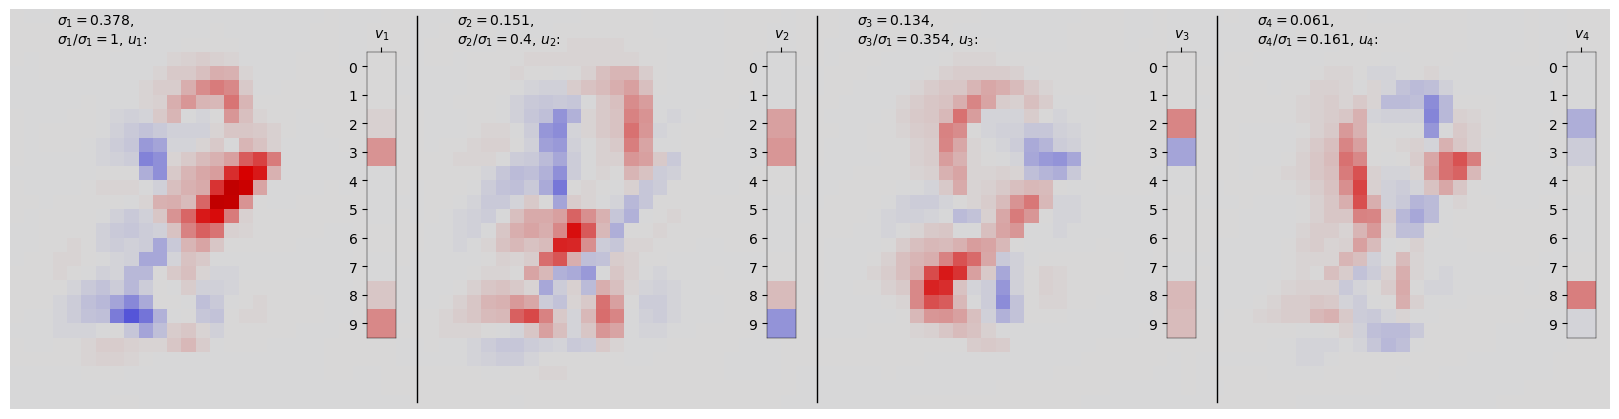

method:  γ=0.361


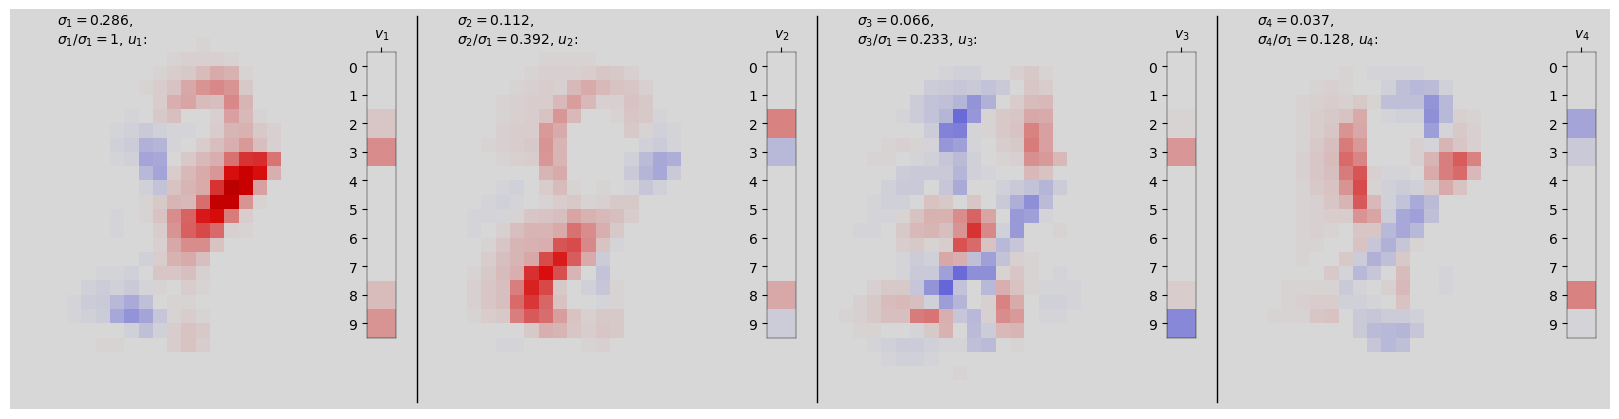

method:  γ=4.968


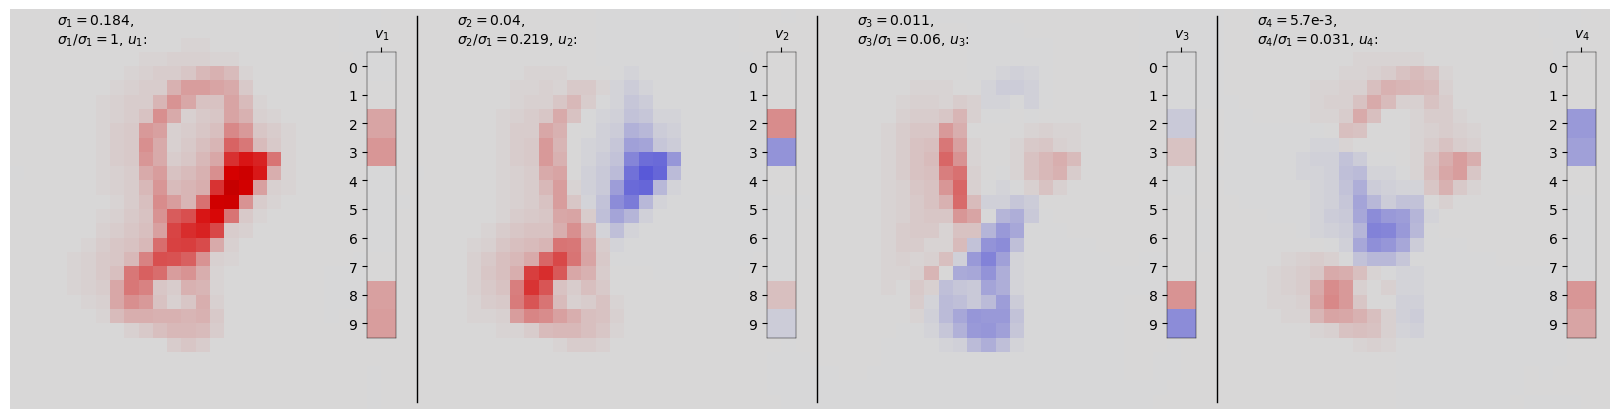

Condtion number: [ 20.73700015  12.07888514  13.82857154 101.87700779]
method:  γ=0.044


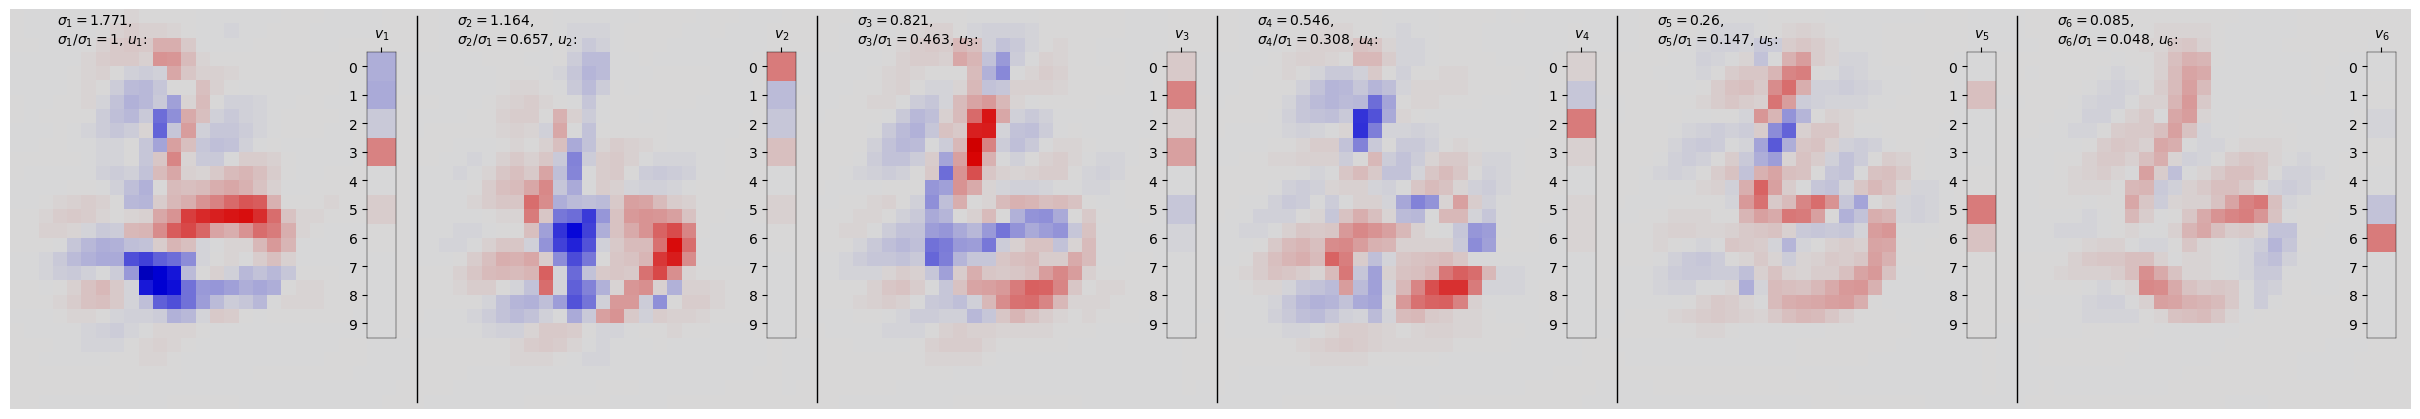

method:  γ=0.213


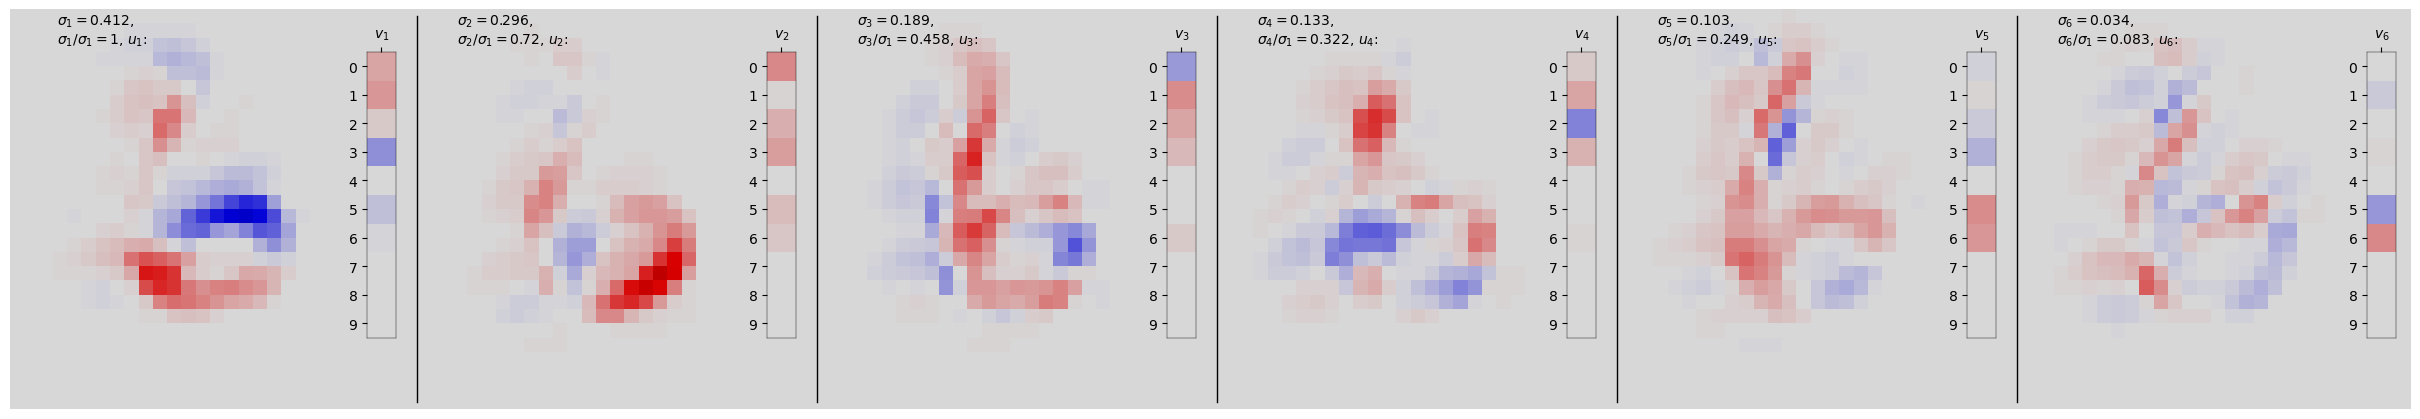

method:  γ=0.361


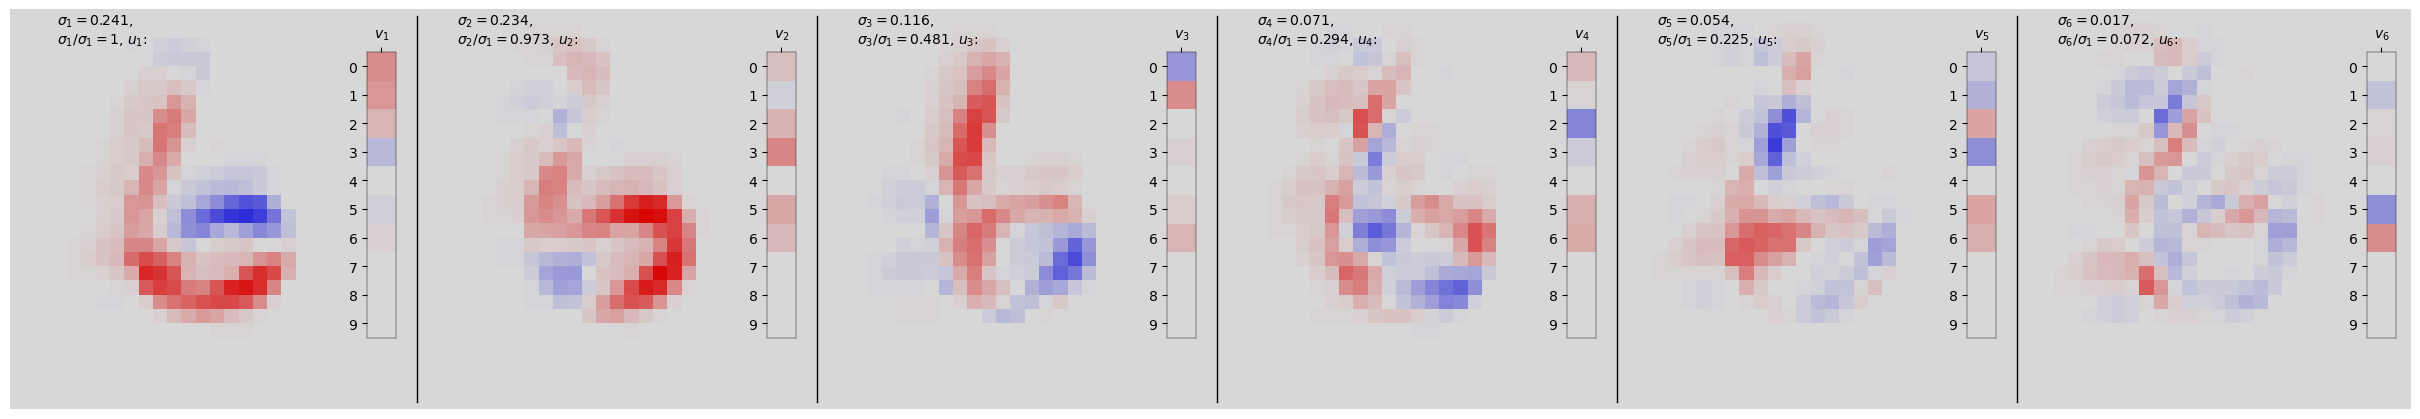

method:  γ=4.968


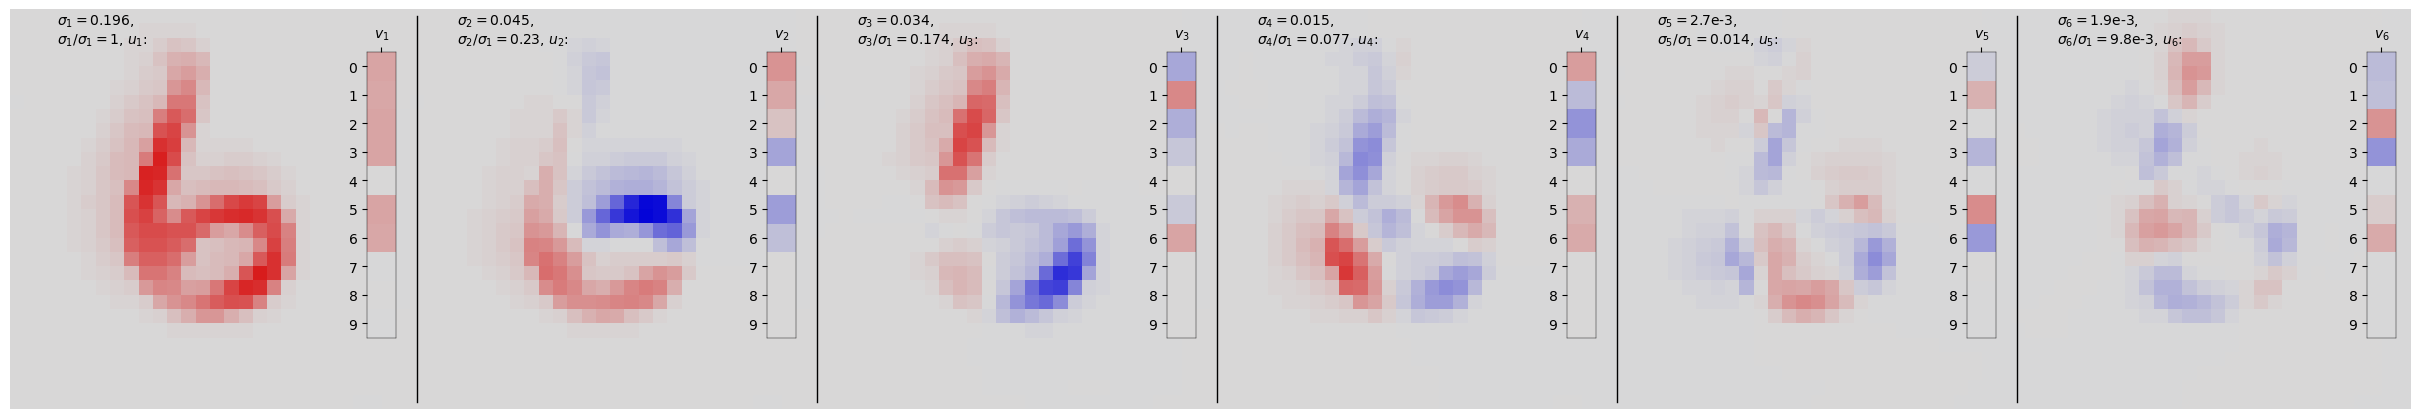

Condtion number: [18.18021358  8.38835397  9.67241568 47.36574638]
method:  γ=0.044


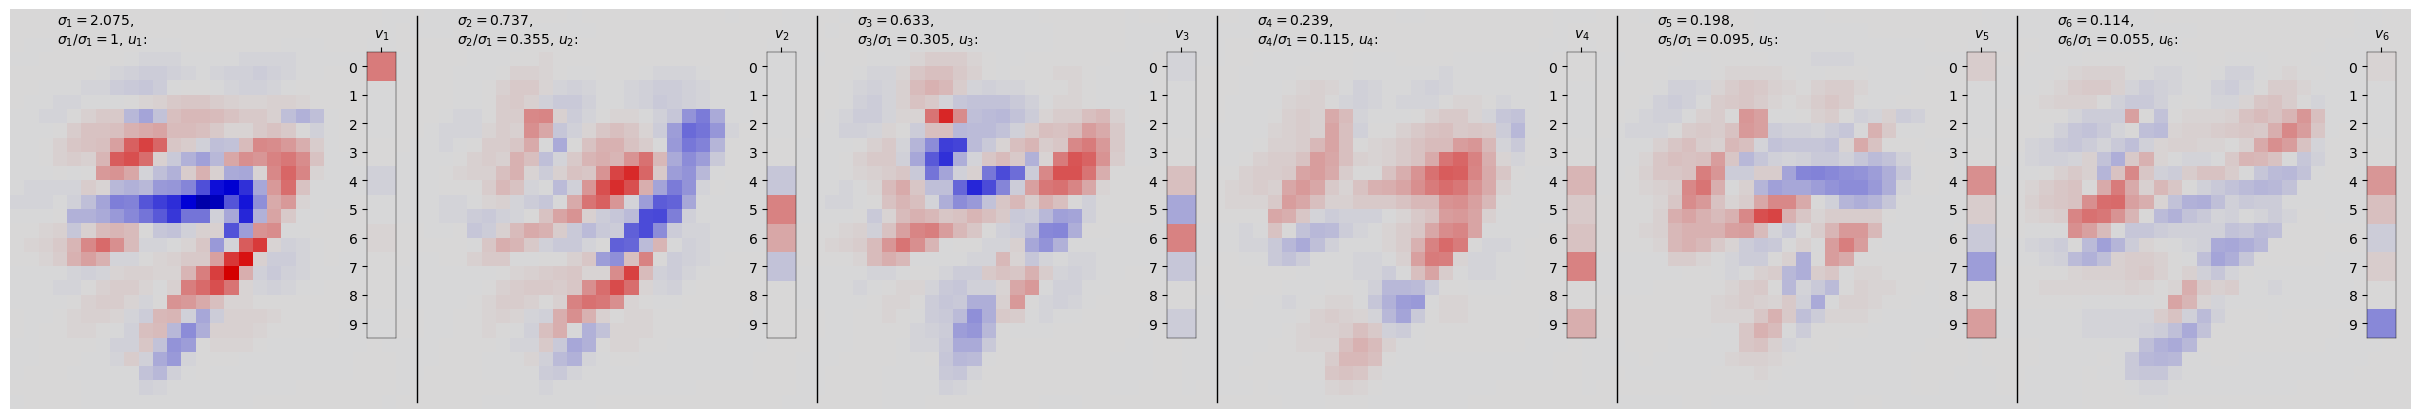

method:  γ=0.213


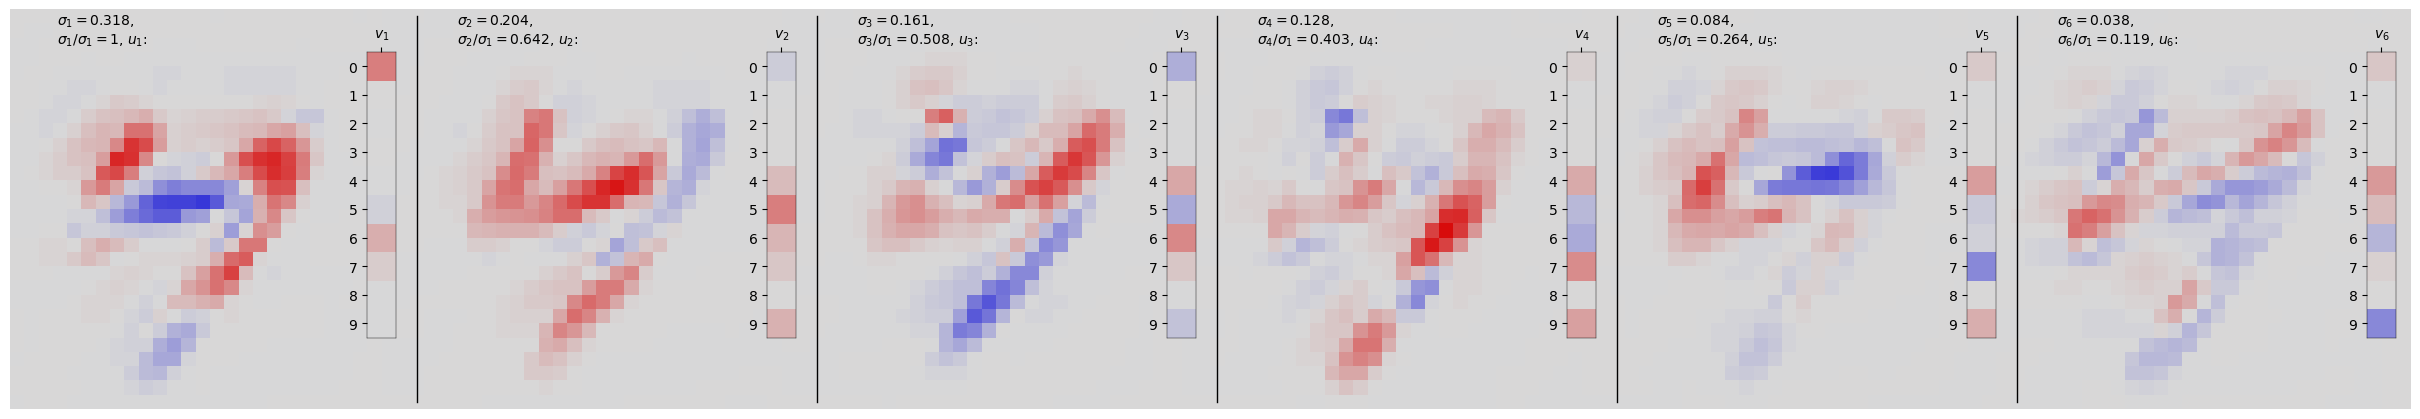

method:  γ=0.361


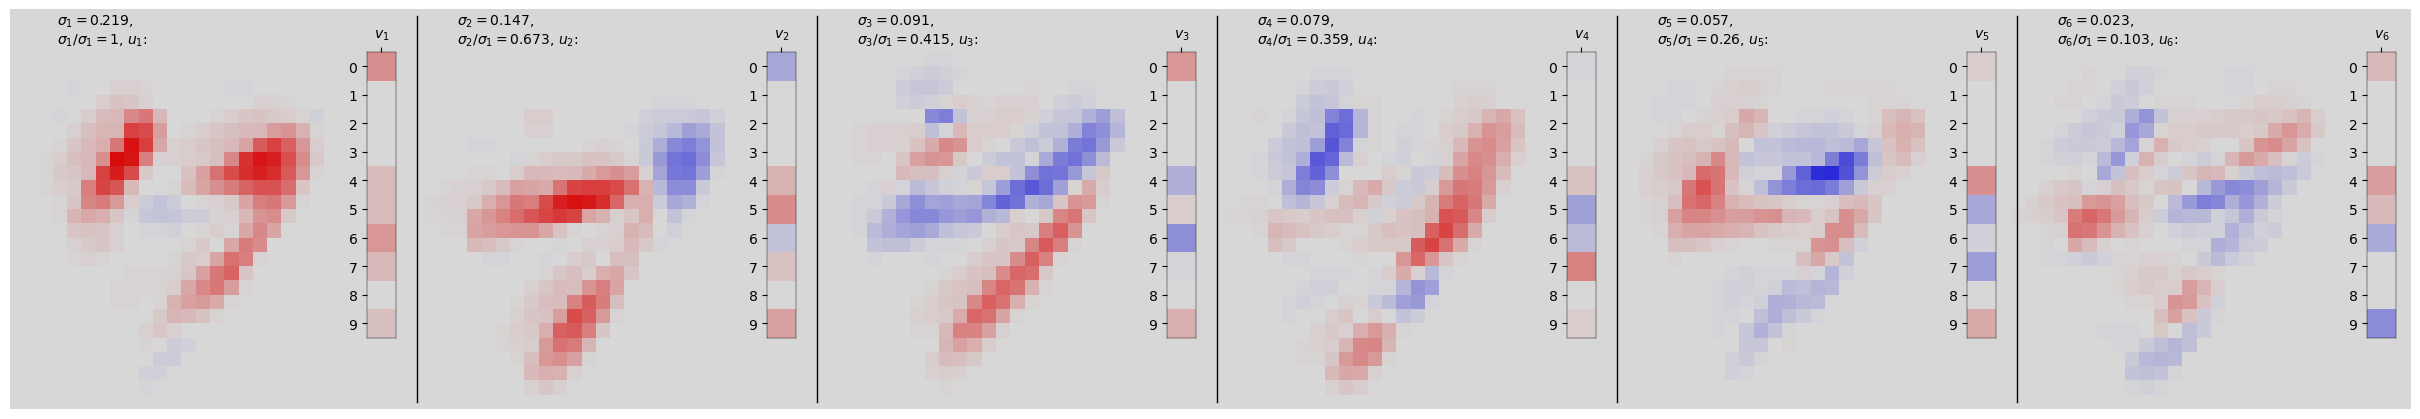

method:  γ=4.968


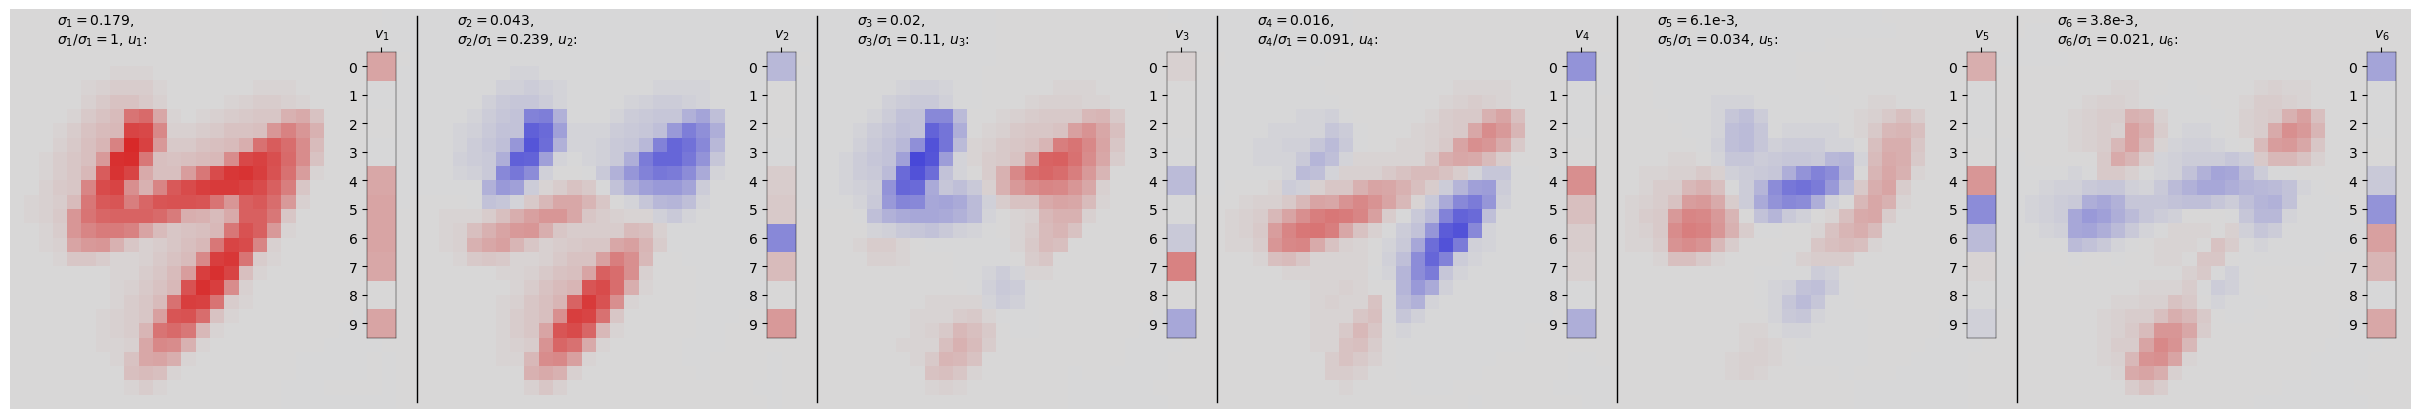

In [81]:
for ip in cond_order_ig[[5, 50, -7]]:
    print('Condtion number:', cond_number_lrp[0, ip, gamma_selection])
    plot_svecs(svals_lrp, lvecs_lrp, rvecs_lrp, iw, ip, gamma_selection, val_selection)
    print('='*50)

#### a lot of points, ordered by condition number


In [113]:
from util.util_cnn import first_mnist_batch, load_mnist_v4_models

model_dict = load_mnist_v4_models()
model_d3 = model_dict[d3_tag]

data, target = first_mnist_batch(100)
output = model_d3(data)

In [ ]:

for ip in cond_order_ig[::]:
    print("activated classes", int((output[ip] > 0).sum()))
    print("target", int(target[ip]))
    print('Condition number:', cond_number_lrp[0, ip, [at_gamma]])
    
    ## plot image
    # plt.imshow(data[ip, 0])
    # plt.show()
    
    ## plot vecs
    plot_svecs(svals_lrp, lvecs_lrp, rvecs_lrp, iw, ip, [at_gamma], val_selection)
    print('='*50)

## IG

In [13]:
times_input = True
times_input_str = ['__woI', ''][times_input]

mats_ig = load_data('d3', 'mats__m0_to_t__testset100__ig50' + normalized_str + times_input_str)
svals_ig, lvecs_ig, rvecs_ig = calc_vals_batch(mats_ig[:1], return_vecs=True)

Attempt loading: d3 mats__m0_to_t__testset100__ig50__unnormalized


100it [00:00, 183.57it/s]


In [14]:
at_parameter = -1
cond_number_ig = condition_number(svals_ig)
cond_order_ig = cond_number_ig[0, :, at_parameter].argsort()

print('number of singular values/activated outputs:\n(Sorted by increasing condition number)')
for i in cond_order_ig: print(unicode_bars[(svals_ig[0,i,at_parameter] > 0).sum()], end='')

number of singular values/activated outputs:
(Sorted by increasing condition number)
▃▃▃▃▃▄▄▄▄▃▄▃▄▃▄▅▄▃▅▅▃▄▅▄▄▅▅▄▃▄▅▄▅▅▃▄▅▄▅▅▅▄▄▅▃▆▄▄▄▅▆▅▄▅▅▅▅▅▅▆▅▅▆▅▇▆▅▆▄▅▅▆▅▅▆▄▅▅▅▅▅▅▅▄▅▄▅▇▆▆▄▆▅▆▆▆▆▆▆▅

Condition number: [3.51734667 3.27143822]
method: GxI
Saved: svecs_w-1_p36_GxI


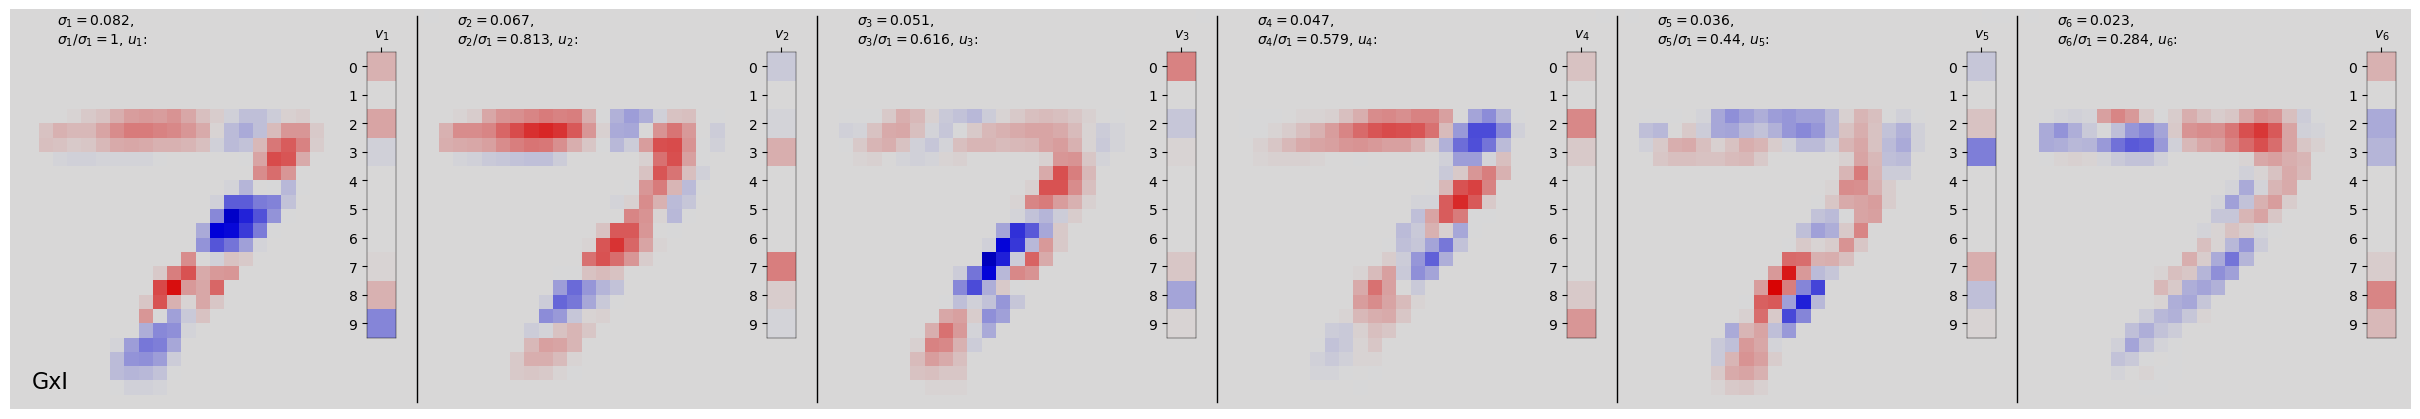

method: IG
Saved: svecs_w-1_p36_IG


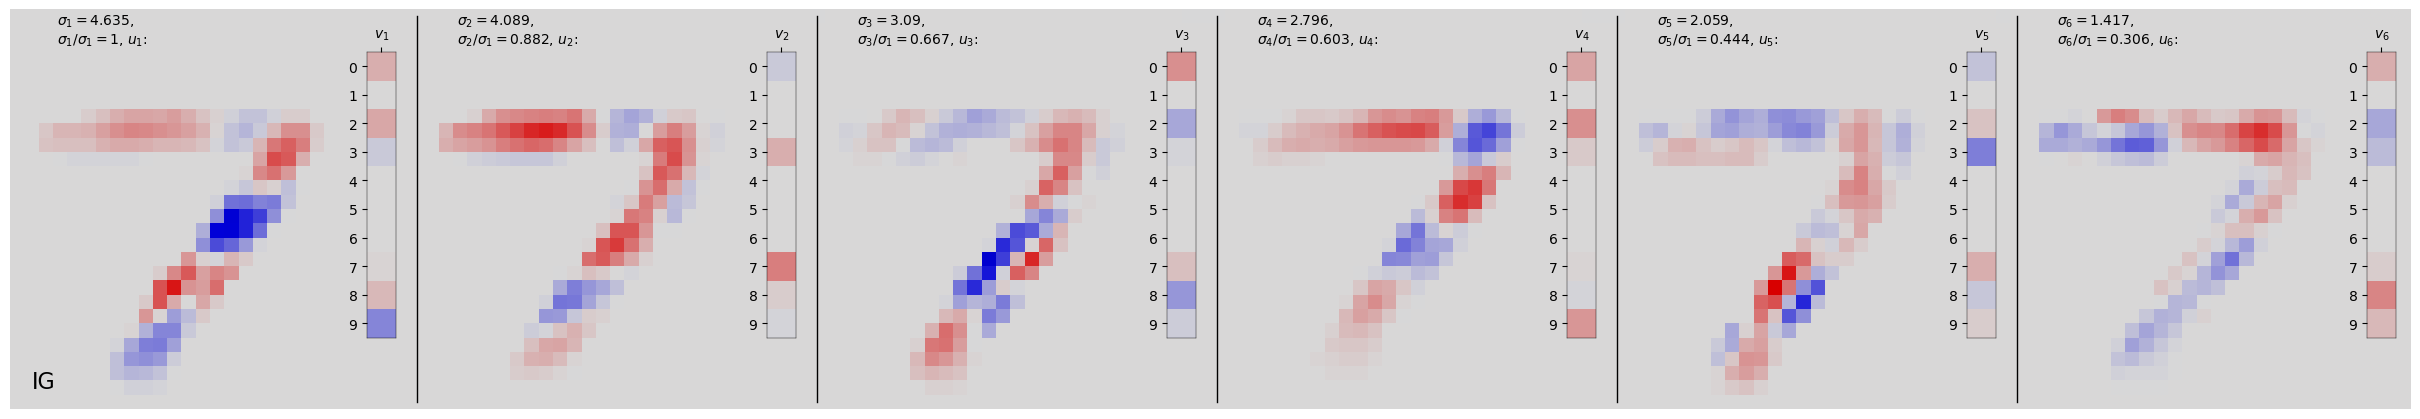

In [17]:
iw = -1
method_selection = [ 0, -1 ]
methods = (1 + np.arange(50)).astype(str)
parameters = np.arange(51).astype(str)
if times_input: parameters[[0, -1]] = ['GxI', 'IG']
else:           parameters[[0, -1]] = ['Gradient', 'IG (wo xI)']
# val_selection = None

# for ip in cond_order_ig[[0, -1]]:
for ip in [36]:
    print('Condition number:', cond_number_ig[0, ip, method_selection])
    plot_svecs(svals_ig, rvecs_ig, lvecs_ig, iw, ip, method_selection, val_selection, methods=parameters, save_func=save_plot)

## SHAP

In [19]:
mats_shap = load_data('d3', 'mats__m0_to_0__testset__shap__background_size-100__batch_size-10' + normalized_str)
svals_shap, lvecs_shap, rvecs_shap = calc_vals_batch(mats_shap, return_vecs=True)

Attempt loading: d3 mats__m0_to_0__testset__shap__background_size-100__batch_size-10__unnormalized


8400it [00:01, 8073.26it/s]


In [20]:
cond_number_shap = condition_number(svals_shap[:, :100])
cond_order_shap = cond_number_shap[0, :, 0].argsort()

print('number of singular values/activated outputs:\n(Sorted by increasing condition number)')
for i in cond_order_shap: print(unicode_bars[(svals_shap[0,i,0] > 0).sum()], end='')

number of singular values/activated outputs:
(Sorted by increasing condition number)
▃▃▃▃▃▃▃▃▃▃▄▄▄▅▄▄▃▄▄▆▄▅▄▅▄▆▄▅▅▆▅▅▆▃▅▄▄▄▆▄▅▆▅▅▅▅▅▅▄▄▅▄▃▅▆▄▅▄▄▅▄▅▄▅▅▅▄▅▄▆▅▆▆▄▄▅▅▅▆▅▅▆▅▅▅▅▆▆▅▅▅▆▇▆▆▅▅▇▅▅

In [237]:
def save_plot(fig, fn, directories=['xai-svd-paper-cai/figures/'], types=['.pdf']):
    for d in directories:
        for t in types:
            fig.savefig(f'{d}{fn}{t}', bbox_inches='tight')
            

SHAP
Condtion number: 2.901458560295232
method: SHAP
Saved: svecs_w-1_p36_SHAP


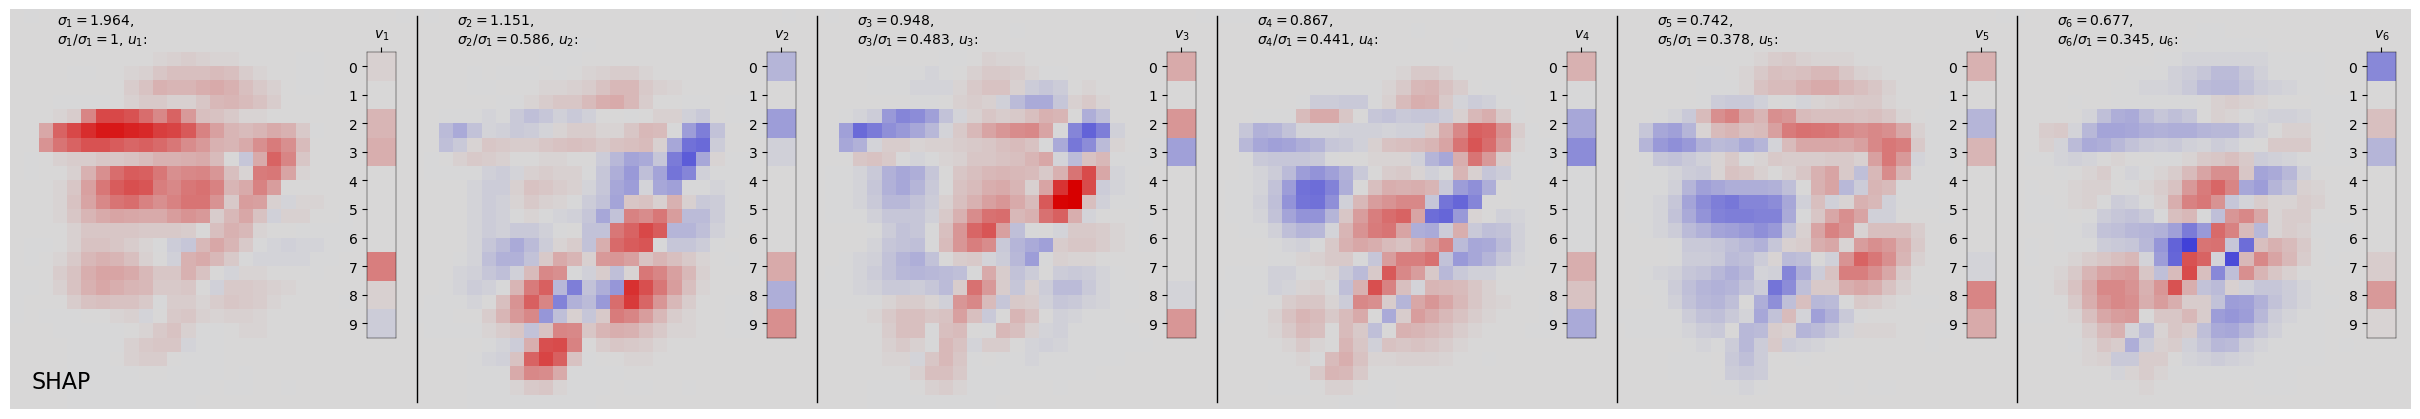

In [21]:
iw, ip = -1, 6

print('SHAP')
# for ip in cond_order_shap[[0, -1]]:
for ip in [36]:
    print('Condtion number:', cond_number_shap[0, ip, 0])
    plot_svecs(svals_shap, rvecs_shap, lvecs_shap, iw, ip, val_selection=val_selection, methods=['SHAP'], save_func=save_plot)

# How do Condition numbers per datapoint correlate across methods?

In [114]:
output[:100].shape

torch.Size([100, 10])

In [119]:
o = output[:100]
p_o = torch.softmax(o, axis=1)
entropy = -torch.sum(p_o * torch.log(p_o), dim=1)
entropy.shape

torch.Size([100])

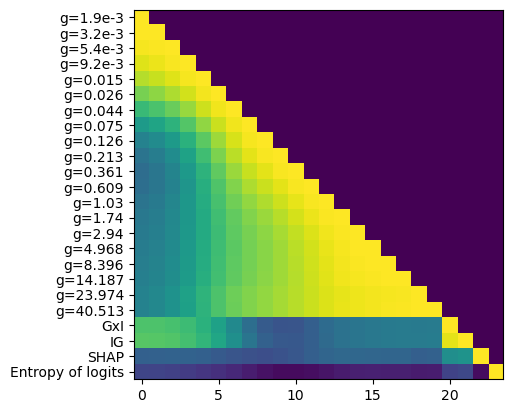

In [190]:
from util.util_data_summary import pretty_num

lrp_slice = gamma_selection
lrp_slice = slice(20,60,2)
svals = np.concatenate((svals_lrp[:, :100, lrp_slice], svals_ig[:, :100, [0, -1]], svals_shap[:, :100]), axis = 2)
cond_number = condition_number(svals)

# entropy of outputs
o = output[:100]
p_o = torch.softmax(o, axis=1)
entropy = -torch.sum(p_o * torch.log(p_o), dim=1)
entropy = entropy[:, None].detach()

cond = cond_number[0]

X = np.concatenate([np.log(cond), entropy], axis=1)
correlation_matrix = np.corrcoef(X, rowvar=False)
plt.imshow(np.tril(correlation_matrix))

ax = plt.gca()
ax.set_yticks(np.arange(len(correlation_matrix)))
labels = np.array(['g='+pretty_num(g) for g in gammas80[lrp_slice]] + ['GxI', 'IG', 'SHAP', 'Entropy of logits'])
ax.set_yticklabels(labels);

In [178]:
sel = [0, 6, 10, -5, -3, -2]

In [186]:
print('Correlation with logit entropy:')
for s in sel:
    print(labels[s], '\t', correlation_matrix[-1, s])

Correlation with logit entropy:
1.9e-3 	 0.20712198260981277
0.044 	 0.11480066584220211
0.361 	 0.028860761082468874
40.513 	 0.07972400572302654
IG 	 0.21559685021717004
SHAP 	 0.03198779766559469


In [197]:
entropy.shape

torch.Size([100, 1])

In [198]:
cond.shape

(100, 23)

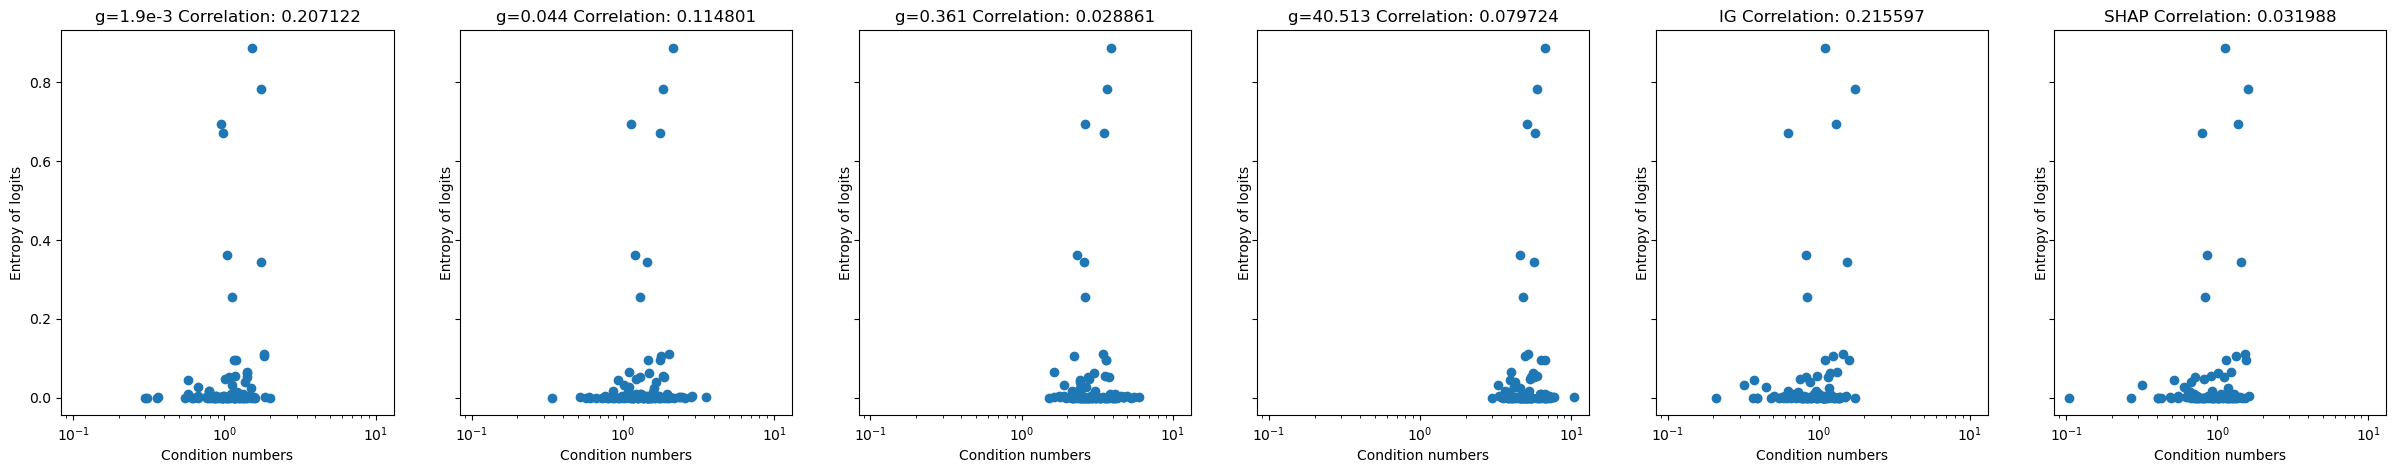

In [202]:
fig, axs = plt.subplots(1, len(sel), figsize=(5*len(sel), 5), sharex=True, sharey=True)

for s, ax in zip(sel, axs):

    
    ax.set_ylabel(labels[-1])
    ax.set_xlabel('Condition numbers')
    ax.set_title(labels[s] + f' Correlation: {correlation_matrix[-1, s]:2f}')
    ax.scatter(cond[:, s], entropy)
    ax.set_xscale('log')
plt.show()

In [193]:
X[s]

array([9.51989392e-01, 9.82639247e-01, 1.06236703e+00, 1.19410935e+00,
       1.39448663e+00, 1.67017982e+00, 2.01902069e+00, 2.44143762e+00,
       2.94166067e+00, 3.48985268e+00, 4.01897705e+00, 4.56497526e+00,
       5.12262904e+00, 5.61086567e+00, 5.99342993e+00, 6.27132184e+00,
       6.46138283e+00, 6.58537406e+00, 6.66339923e+00, 6.71143294e+00,
       1.16866160e+00, 1.05728515e+00, 9.69640307e-01, 1.53330341e-03])

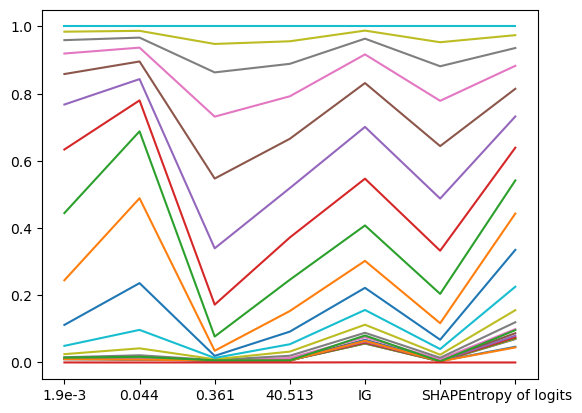

In [169]:
plt.plot(labels[sel], (X / X.max(axis=1, keepdims=True))[sel]);

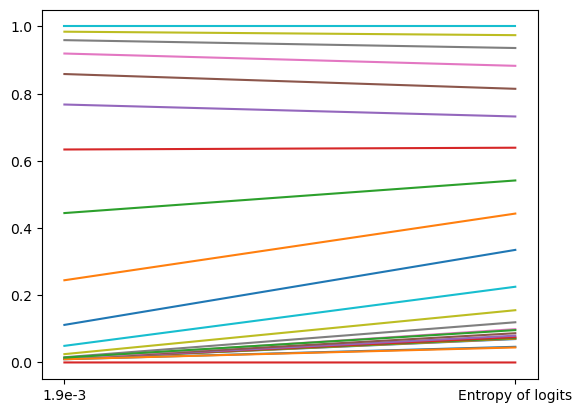

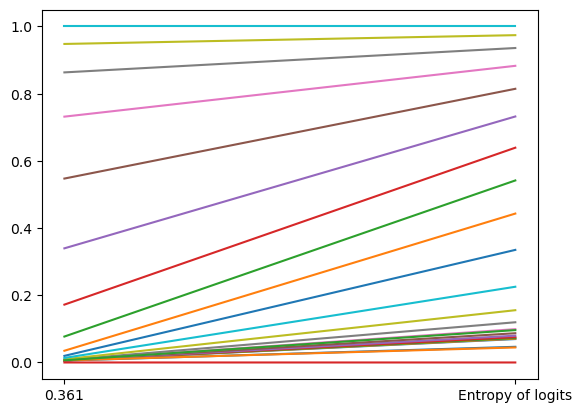

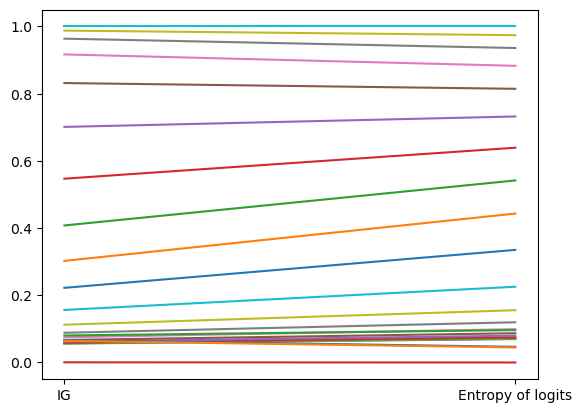

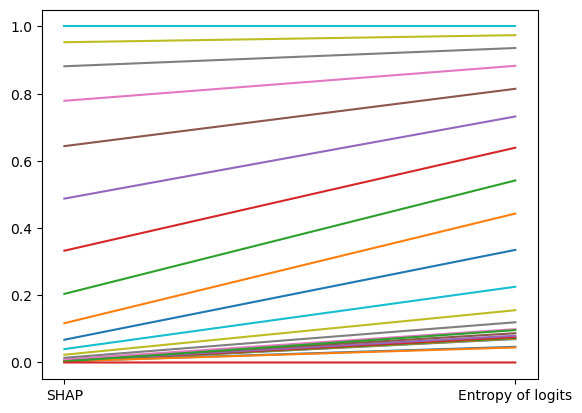

In [146]:
for s in sel[:-1]:
    ss = [s, sel[-1]]
    plt.plot(labels[ss], (X / X.max(axis=1, keepdims=True))[ss])
    plt.show()

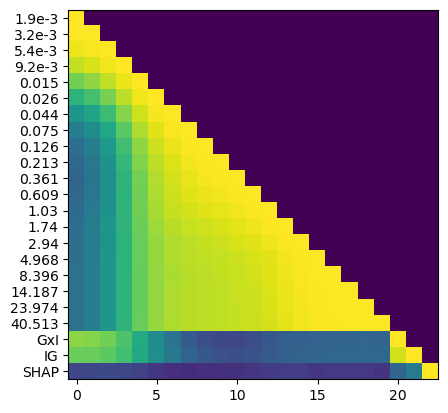

In [ ]:
unnormalized